# Breast Cancer Wisconsin (Diagnostic) Data Set



特徴は、乳房腫瘤の穿刺吸引（FNA）のデジタル化された画像から計算されます。彼らは、画像に存在する細胞核の特徴を説明します。 n 3次元空間は、[K。 P.ベネットとO. L.マンガサリアン：「2つの線形に分離できないセットのロバストな線形プログラミング識別」、最適化方法とソフトウェア1、1992、23-34]。

このデータベースは、UW CS ftpサーバーからも入手できます。ftpftp.cs.wisc.edu cd math-prog / cpo-dataset / machine-learn / WDBC /また、UCI Machine Learning Repository：https：// archiveにもあります。 .ics.uci.edu / ml / datasets / Breast + Cancer + Wisconsin +％28Diagnostic％29属性情報：

1）ID番号<br>

2）診断（M =悪性、B =良性）<br>

3-32）10個の実数値の特徴が計算されます各細胞核の場合：<br>
a）半径（中心から周囲の点までの距離の平均）<br>
b）テクスチャ（グレースケール値の標準偏差）<br>
c）周囲<br>
d）面積<br>
e）滑らかさ（半径の長さの局所変動）<br>
f）コンパクトさ（境界^ 2 /面積-1.0）<br>
g）凹面（輪郭の凹面部分の重大度）<br>
h）凹点（輪郭の凹面部分の数）<br>
i）対称性j）フラクタル次元（「海岸線近似」-1）<br>
<br>
これらの特徴の平均、標準誤差、および「最悪」または最大（3つの最大値の平均）が各画像に対して計算され、30個の特徴が得られました。
<br>
たとえば、フィールド3は平均半径、フィールド13は半径SE、フィールド23は最悪半径です。すべての機能値は4桁の有効数字で記録されます。属性値の欠落：なしクラス分布：357良性、悪性212

## データ分析
必要になるライブラリ呼ぶ

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# データ読み込み

In [3]:
train_df = pd.read_csv('~/Dropbox/@00_input/Breast_Cancer/data.csv')

データフレームのカラムを取得

In [4]:
print(train_df.columns.values)
#print(test_df.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


In [7]:
print("train data size", train_df.shape)
#print("train data size", test_df.shape)

train data size (569, 33)


In [8]:
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


null チェック

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## データ(object)の確認

## diagnosis
2種類
<br>
診断（M =悪性、B =良性）


In [6]:
mycounter = Counter(train_df.diagnosis)
n = 1
for word in mycounter.most_common():
    print(word, n)
    n = n +1

('B', 357) 1
('M', 212) 2


## データ分析方針
- idの削除
- 文字列（診断）の数値化　（M:1 =悪性、B:0 =良性）
- hotmap

In [12]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))

#Save the 'Id' column
train_ID = train_df['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 

The train data size before dropping Id feature is : (569, 33) 

The train data size after dropping Id feature is : (569, 32) 


In [13]:
train_df.diagnosis = train_df.diagnosis.replace(['B', 'M'], [0, 1])

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [25]:
print("train data size", train_df.shape)

train data size (569, 32)


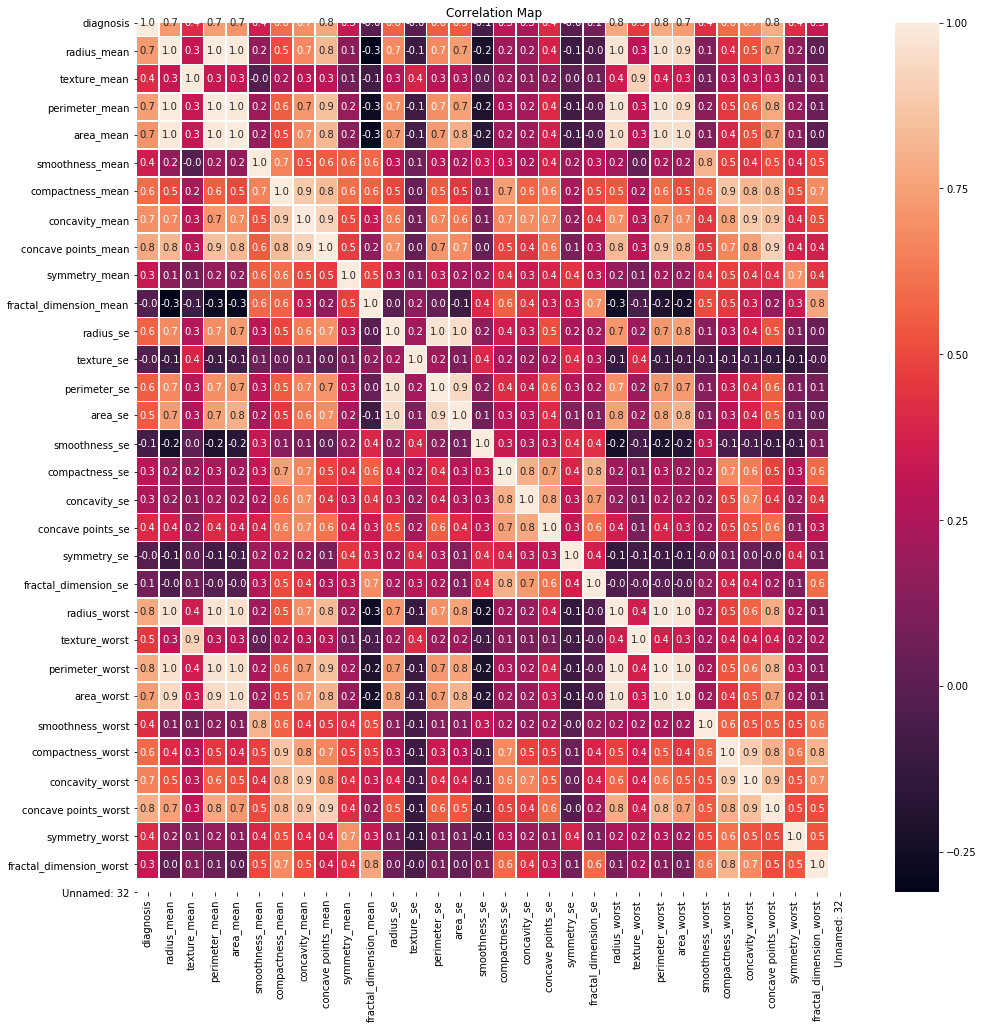

In [27]:
f,ax=plt.subplots(figsize = (16,16))
sns.heatmap(train_df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()